<a href="https://colab.research.google.com/github/Sk-Ashif-Ahmmad732/IDEAS_Internship_Project/blob/main/IDEAS_Internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

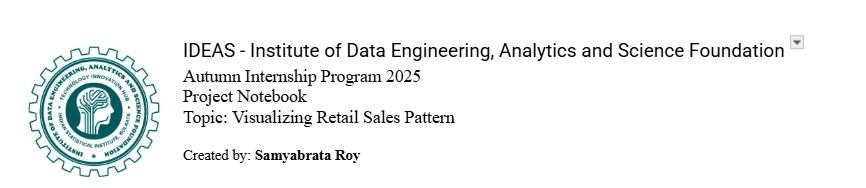

# **This notebook is structured as an assignment.**

# **The goal is to explore sales patterns, monthly revenue trends, and best-selling product categories.**

# **Project Submitted By :-** **Sk Ashif Ahmmad**
# **Intern**
# **Stream:- Information Technology**
# **College:- Government College of Engineering and Leather Technology**


# **This Section Includes :-**

# **1.Monthly Revenue Trend, 2. Revenue by Category, 3. Revenue by Season, 4. Purchase Amount Distribution, 5. Purchase Count by Category, 6. Top 10 Popular Colors, 7. Size Distribution, 8. Average Purchase Amount by Category, 9. Daily Purchase Frequency Diagrams.**

# **Visualizing monthly revenue helps us to understand sales trends across the year.**  



            SHOPPING BEHAVIOR PATTERN ANALYSIS TOOL 
Loading data from Google Drive (file_id=1Dp708WBa8hbbo7oXFrWTy0PBmVV8lflg)...
Data loaded successfully!

Dataset Info:
  - Total Records: 2000
  - Date Range: 2023-01-01 to 2024-01-01
  - Columns: ['Customer ID', 'Category', 'Purchase Amount (USD)', 'Size', 'Color', 'Season', 'Date']

First 5 rows:
   Customer ID  Category  Purchase Amount (USD) Size      Color  Season  \
0            1  Clothing                     53    L       Gray  Winter   
1            2  Clothing                     64    L     Maroon  Winter   
2            3  Clothing                     73    S     Maroon  Spring   
3            4  Footwear                     90    M     Maroon  Spring   
4            5  Clothing                     49    M  Turquoise  Spring   

        Date  
0 2023-11-24  
1 2023-02-27  
2 2023-01-13  
3 2023-05-21  
4 2023-05-06  

                    SHOPPING BEHAVIOR ANALYSIS REPORT

 OVERALL STATISTICS:
----------------------------

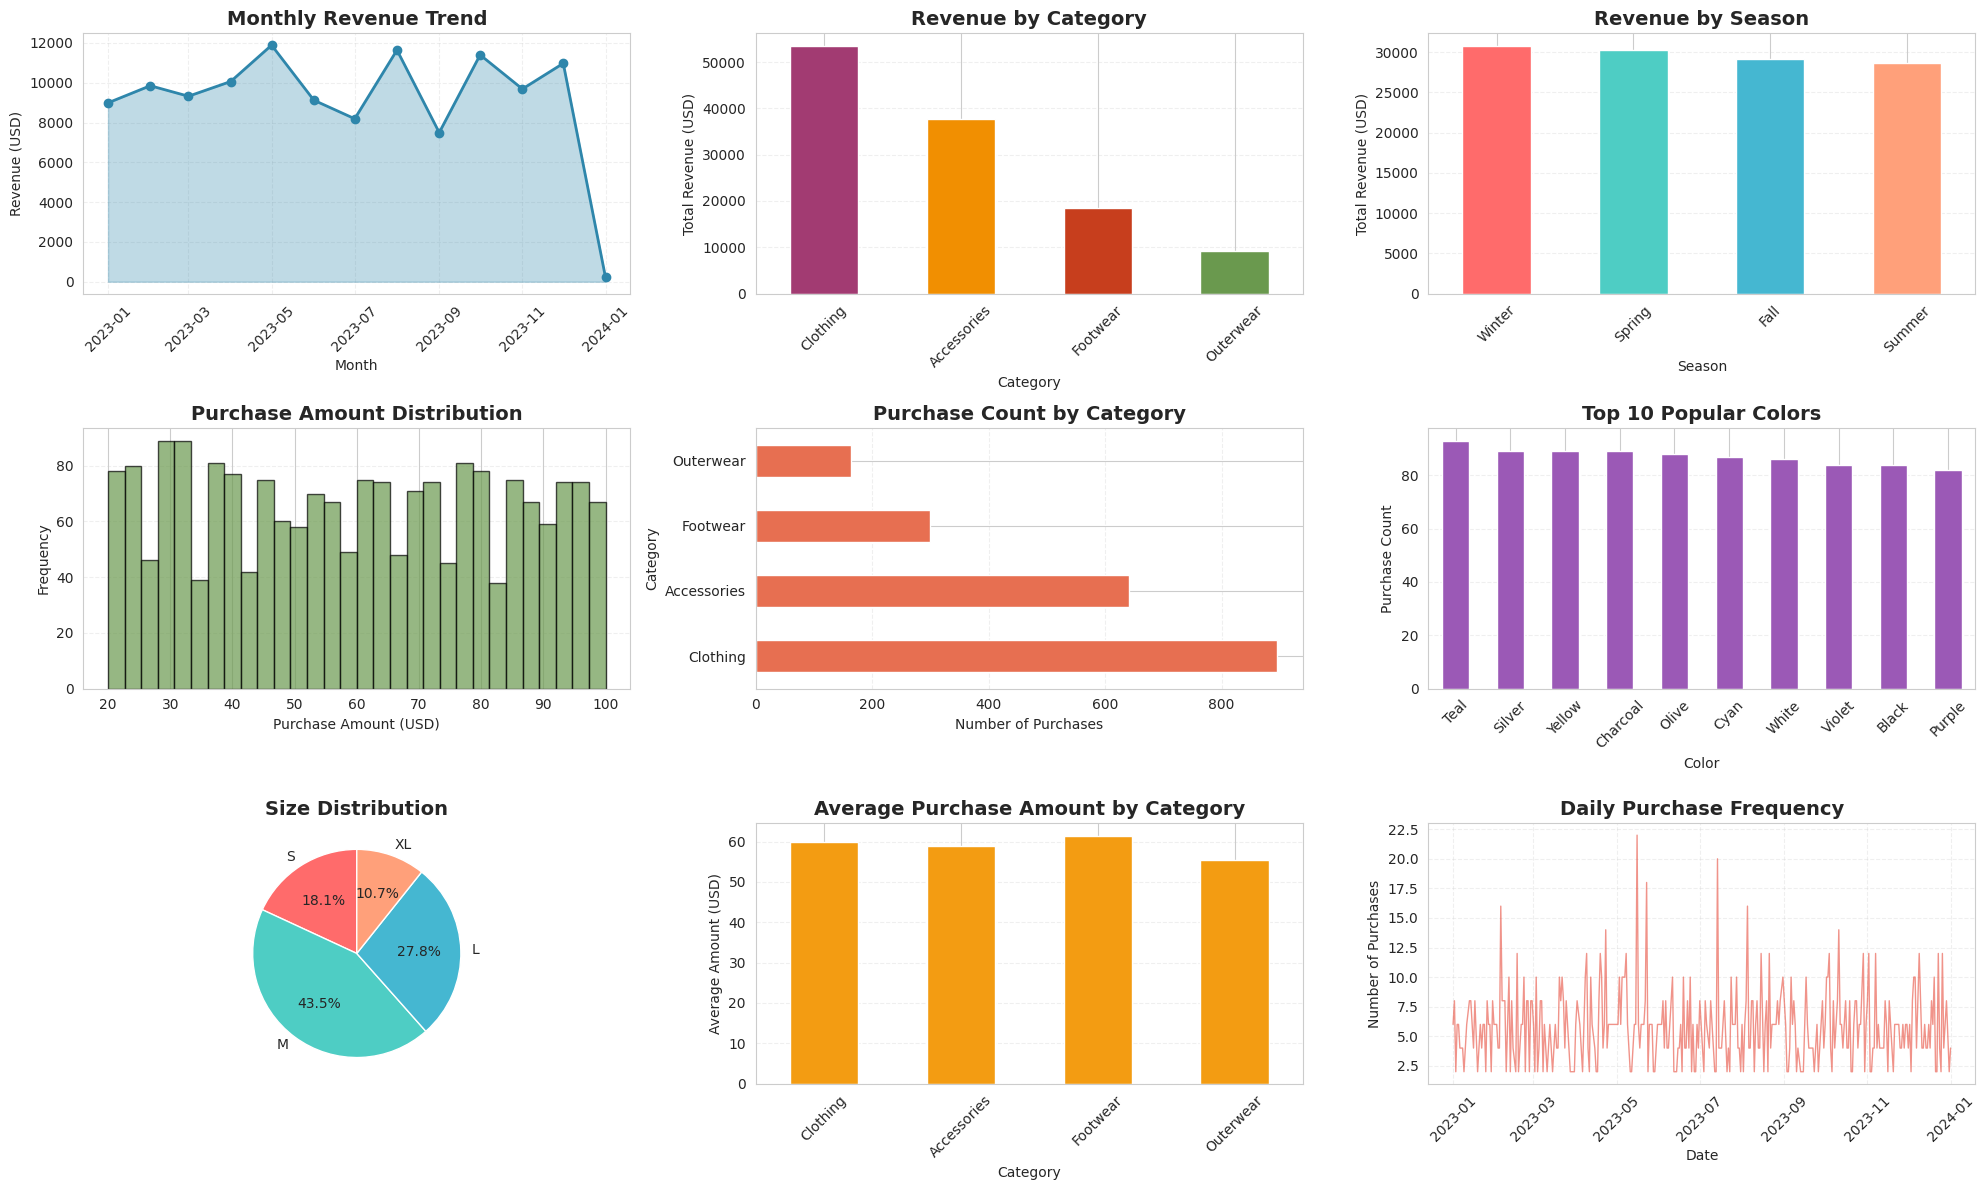

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# --- Load Data Function ---
def load_and_prepare_data(file_id=None, local_file=None):
    """
    Load shopping behavior data from CSV file.
    """
    try:
        if file_id:
            url = f"https://drive.google.com/uc?export=download&id=1Dp708WBa8hbbo7oXFrWTy0PBmVV8lflg"
            print(f"Loading data from Google Drive (file_id=1Dp708WBa8hbbo7oXFrWTy0PBmVV8lflg)...")
            df = pd.read_csv(url)
        elif local_file:
            print(f"Loading data from local file: {local_file}")
            df = pd.read_csv(local_file)

        # Convert Date column to datetime
        df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

        print("Data loaded successfully!")
        print(f"\nDataset Info:")
        print(f"  - Total Records: {len(df)}")
        print(f"  - Date Range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
        print(f"  - Columns: {list(df.columns)}")
        print("\nFirst 5 rows:")
        print(df.head())

        return df

    except Exception as e:
        print(f" Error loading data: {e}")
        return None


# --- Calculate Monthly Revenue ---
def calculate_monthly_revenue(df):
    """Calculate monthly revenue from purchase amounts."""
    df['Month'] = df['Date'].dt.to_period('M')
    monthly_revenue = df.groupby('Month')['Purchase Amount (USD)'].sum()
    monthly_revenue.index = monthly_revenue.index.to_timestamp()
    return monthly_revenue


# --- Analyze by Category ---
def analyze_by_category(df):
    """Analyze purchase patterns by category."""
    category_stats = df.groupby('Category').agg({
        'Purchase Amount (USD)': ['sum', 'mean', 'count']
    }).round(2)
    category_stats.columns = ['Total Revenue', 'Avg Purchase', 'Count']
    return category_stats.sort_values('Total Revenue', ascending=False)


# --- Analyze by Season ---
def analyze_by_season(df):
    """Analyze purchase patterns by season."""
    season_stats = df.groupby('Season').agg({
        'Purchase Amount (USD)': ['sum', 'mean', 'count']
    }).round(2)
    season_stats.columns = ['Total Revenue', 'Avg Purchase', 'Count']
    return season_stats.sort_values('Total Revenue', ascending=False)


# --- Analyze by Size ---
def analyze_by_size(df):
    """Analyze purchase distribution by size."""
    size_stats = df.groupby('Size').agg({
        'Purchase Amount (USD)': ['sum', 'count']
    }).round(2)
    size_stats.columns = ['Total Revenue', 'Count']
    return size_stats.sort_values('Count', ascending=False)


# --- Top Colors Analysis ---
def analyze_colors(df):
    """Analyze most popular colors."""
    color_stats = df.groupby('Color').agg({
        'Purchase Amount (USD)': ['sum', 'count']
    }).round(2)
    color_stats.columns = ['Total Revenue', 'Count']
    return color_stats.sort_values('Count', ascending=False).head(10)


# --- Revenue Trends Analysis ---
def analyze_revenue_trends(monthly_revenue):
    """Analyze revenue trends and growth."""
    monthly_growth = monthly_revenue.pct_change() * 100

    stats = {
        'Total Revenue': monthly_revenue.sum(),
        'Average Monthly Revenue': monthly_revenue.mean(),
        'Highest Month': monthly_revenue.max(),
        'Lowest Month': monthly_revenue.min(),
        'Revenue Std Dev': monthly_revenue.std(),
        'Average Growth Rate': monthly_growth.mean()
    }
    return stats, monthly_growth


# --- Comprehensive Visualization ---
def visualize_analysis(df, monthly_revenue, category_stats, season_stats, color_stats):
    """Create comprehensive visualizations."""

    fig = plt.figure(figsize=(20, 12))

    # 1. Monthly Revenue Trend
    ax1 = plt.subplot(3, 3, 1)
    ax1.plot(monthly_revenue.index, monthly_revenue.values, marker='o',
             linewidth=2, color='#2E86AB', markersize=6)
    ax1.set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Month', fontsize=10)
    ax1.set_ylabel('Revenue (USD)', fontsize=10)
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, linestyle="--", alpha=0.3)
    ax1.fill_between(monthly_revenue.index, monthly_revenue.values, alpha=0.3, color='#2E86AB')

    # 2. Category Revenue Distribution
    ax2 = plt.subplot(3, 3, 2)
    colors_cat = ['#A23B72', '#F18F01', '#C73E1D', '#6A994E', '#BC4B51']
    category_stats['Total Revenue'].plot(kind='bar', ax=ax2, color=colors_cat)
    ax2.set_title('Revenue by Category', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Category', fontsize=10)
    ax2.set_ylabel('Total Revenue (USD)', fontsize=10)
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(axis='y', linestyle="--", alpha=0.3)

    # 3. Season Revenue Distribution
    ax3 = plt.subplot(3, 3, 3)
    colors_season = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
    season_stats['Total Revenue'].plot(kind='bar', ax=ax3, color=colors_season)
    ax3.set_title('Revenue by Season', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Season', fontsize=10)
    ax3.set_ylabel('Total Revenue (USD)', fontsize=10)
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(axis='y', linestyle="--", alpha=0.3)

    # 4. Purchase Amount Distribution
    ax4 = plt.subplot(3, 3, 4)
    ax4.hist(df['Purchase Amount (USD)'], bins=30, color='#6A994E', alpha=0.7, edgecolor='black')
    ax4.set_title('Purchase Amount Distribution', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Purchase Amount (USD)', fontsize=10)
    ax4.set_ylabel('Frequency', fontsize=10)
    ax4.grid(axis='y', linestyle="--", alpha=0.3)

    # 5. Category Purchase Count
    ax5 = plt.subplot(3, 3, 5)
    category_stats['Count'].plot(kind='barh', ax=ax5, color='#E76F51')
    ax5.set_title('Purchase Count by Category', fontsize=14, fontweight='bold')
    ax5.set_xlabel('Number of Purchases', fontsize=10)
    ax5.set_ylabel('Category', fontsize=10)
    ax5.grid(axis='x', linestyle="--", alpha=0.3)

    # 6. Top 10 Colors
    ax6 = plt.subplot(3, 3, 6)
    color_stats['Count'].head(10).plot(kind='bar', ax=ax6, color='#9B59B6')
    ax6.set_title('Top 10 Popular Colors', fontsize=14, fontweight='bold')
    ax6.set_xlabel('Color', fontsize=10)
    ax6.set_ylabel('Purchase Count', fontsize=10)
    ax6.tick_params(axis='x', rotation=45)
    ax6.grid(axis='y', linestyle="--", alpha=0.3)

    # 7. Size Distribution
    ax7 = plt.subplot(3, 3, 7)
    size_order = ['S', 'M', 'L', 'XL']
    size_counts = df['Size'].value_counts().reindex(size_order, fill_value=0)
    ax7.pie(size_counts.values, labels=size_counts.index, autopct='%1.1f%%',
            colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], startangle=90)
    ax7.set_title('Size Distribution', fontsize=14, fontweight='bold')

    # 8. Average Purchase by Category
    ax8 = plt.subplot(3, 3, 8)
    category_stats['Avg Purchase'].plot(kind='bar', ax=ax8, color='#F39C12')
    ax8.set_title('Average Purchase Amount by Category', fontsize=14, fontweight='bold')
    ax8.set_xlabel('Category', fontsize=10)
    ax8.set_ylabel('Average Amount (USD)', fontsize=10)
    ax8.tick_params(axis='x', rotation=45)
    ax8.grid(axis='y', linestyle="--", alpha=0.3)

    # 9. Purchases Over Time
    ax9 = plt.subplot(3, 3, 9)
    daily_counts = df.groupby(df['Date'].dt.date).size()
    ax9.plot(daily_counts.index, daily_counts.values, color='#E74C3C', linewidth=1, alpha=0.6)
    ax9.set_title('Daily Purchase Frequency', fontsize=14, fontweight='bold')
    ax9.set_xlabel('Date', fontsize=10)
    ax9.set_ylabel('Number of Purchases', fontsize=10)
    ax9.tick_params(axis='x', rotation=45)
    ax9.grid(True, linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()


# --- Print Summary Report ---
def print_summary_report(df, stats, category_stats, season_stats):
    """Print comprehensive summary report."""
    print("\n" + "="*70)
    print("                    SHOPPING BEHAVIOR ANALYSIS REPORT")
    print("="*70)

    print("\n OVERALL STATISTICS:")
    print("-" * 70)
    print(f"  Total Revenue:              ${stats['Total Revenue']:,.2f}")
    print(f"  Average Monthly Revenue:    ${stats['Average Monthly Revenue']:,.2f}")
    print(f"  Highest Monthly Revenue:    ${stats['Highest Month']:,.2f}")
    print(f"  Lowest Monthly Revenue:     ${stats['Lowest Month']:,.2f}")
    print(f"  Revenue Standard Deviation: ${stats['Revenue Std Dev']:,.2f}")
    print(f"  Average Growth Rate:        {stats['Average Growth Rate']:.2f}%")

    print("\n CATEGORY ANALYSIS:")
    print("-" * 70)
    print(category_stats.to_string())

    print("\n  SEASON ANALYSIS:")
    print("-" * 70)
    print(season_stats.to_string())

    print("\n PURCHASE STATISTICS:")
    print("-" * 70)
    print(f"  Average Purchase:           ${df['Purchase Amount (USD)'].mean():.2f}")
    print(f"  Median Purchase:            ${df['Purchase Amount (USD)'].median():.2f}")
    print(f"  Min Purchase:               ${df['Purchase Amount (USD)'].min():.2f}")
    print(f"  Max Purchase:               ${df['Purchase Amount (USD)'].max():.2f}")
    print(f"  Total Transactions:         {len(df):,}")

    print("\n" + "="*70)


# --- Main Execution ---
def main():
    print("\n" + "="*70)
    print("            SHOPPING BEHAVIOR PATTERN ANALYSIS TOOL ")
    print("="*70)

    # Load data - Update this path to your CSV file location
    file_path = "shopping_behavior_Pattern.csv"
    df = load_and_prepare_data(file_path)

    if df is not None:
        # Perform analyses
        monthly_revenue = calculate_monthly_revenue(df)
        category_stats = analyze_by_category(df)
        season_stats = analyze_by_season(df)
        size_stats = analyze_by_size(df)
        color_stats = analyze_colors(df)
        stats, monthly_growth = analyze_revenue_trends(monthly_revenue)

        # Print summary report
        print_summary_report(df, stats, category_stats, season_stats)

        # Create visualizations
        print("\n Generating visualizations...")
        visualize_analysis(df, monthly_revenue, category_stats, season_stats, color_stats)


    else:
        print("\n Analysis failed. Please check the file path and format.")


# Run the analysis
if __name__ == "__main__":
    main()




#After inspecting the contribution of each categories towards the total revenue we can say which categotry has contributed how much. But it's necessary to get a relative quantification to compare between the categories' contribution.

#So, we'll now see some donut charts of revenue contributions by category

# **This Section Contains:-**
# **1. Total Revenue by Product Category, 2. Revenue Distribution by Season, 3. Purchase Count Distribution by Category, 4. Purchase Distribution by Size, 5. Top 5 Colors by Revenue, 6. Shopping Behaviour Analysis - Comaparative View Donut Chart Diagrams.**




       SHOPPING BEHAVIOR DONUT CHART ANALYSIS TOOL 
Loading data from Google Drive (file_id=1Dp708WBa8hbbo7oXFrWTy0PBmVV8lflg)...
 Data loaded successfully!

Dataset Info:
  - Total Records: 2000
  - Date Range: 2023-01-01 to 2024-01-01
  - Categories: ['Clothing', 'Footwear', 'Outerwear', 'Accessories']

First 5 rows:
   Customer ID  Category  Purchase Amount (USD) Size      Color  Season  \
0            1  Clothing                     53    L       Gray  Winter   
1            2  Clothing                     64    L     Maroon  Winter   
2            3  Clothing                     73    S     Maroon  Spring   
3            4  Footwear                     90    M     Maroon  Spring   
4            5  Clothing                     49    M  Turquoise  Spring   

        Date  
0 2023-11-24  
1 2023-02-27  
2 2023-01-13  
3 2023-05-21  
4 2023-05-06  

                    SHOPPING BEHAVIOR SUMMARY

 CATEGORY BREAKDOWN:
--------------------------------------------------------------------

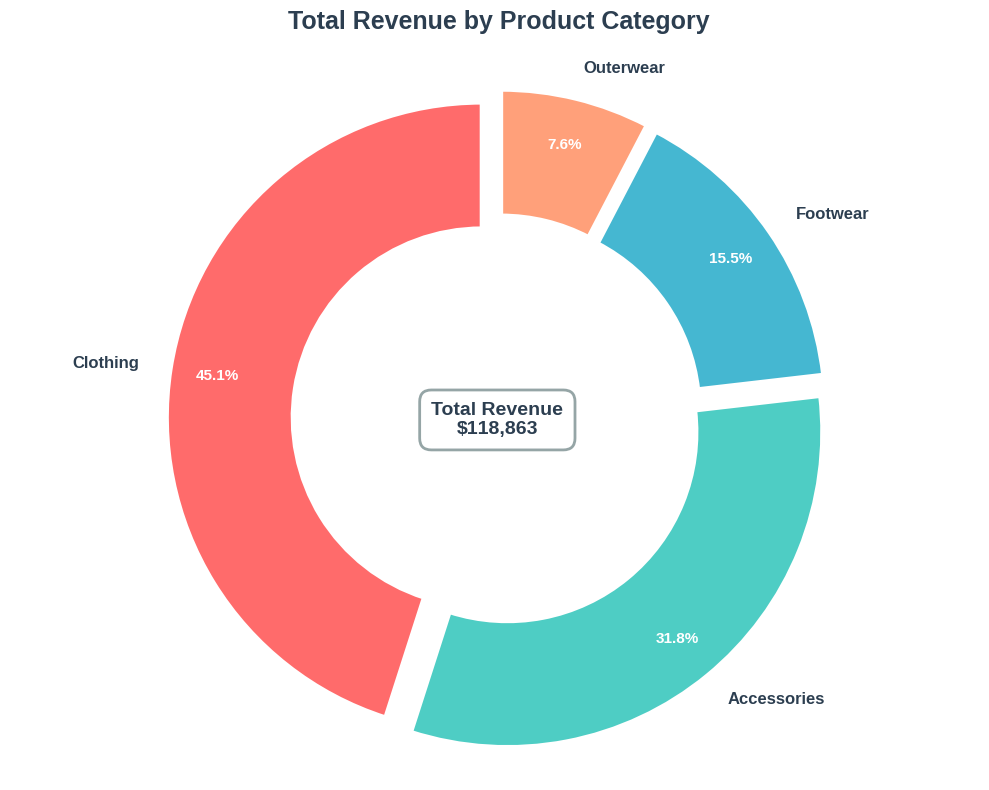


 Creating Purchases by Season Donut Chart...


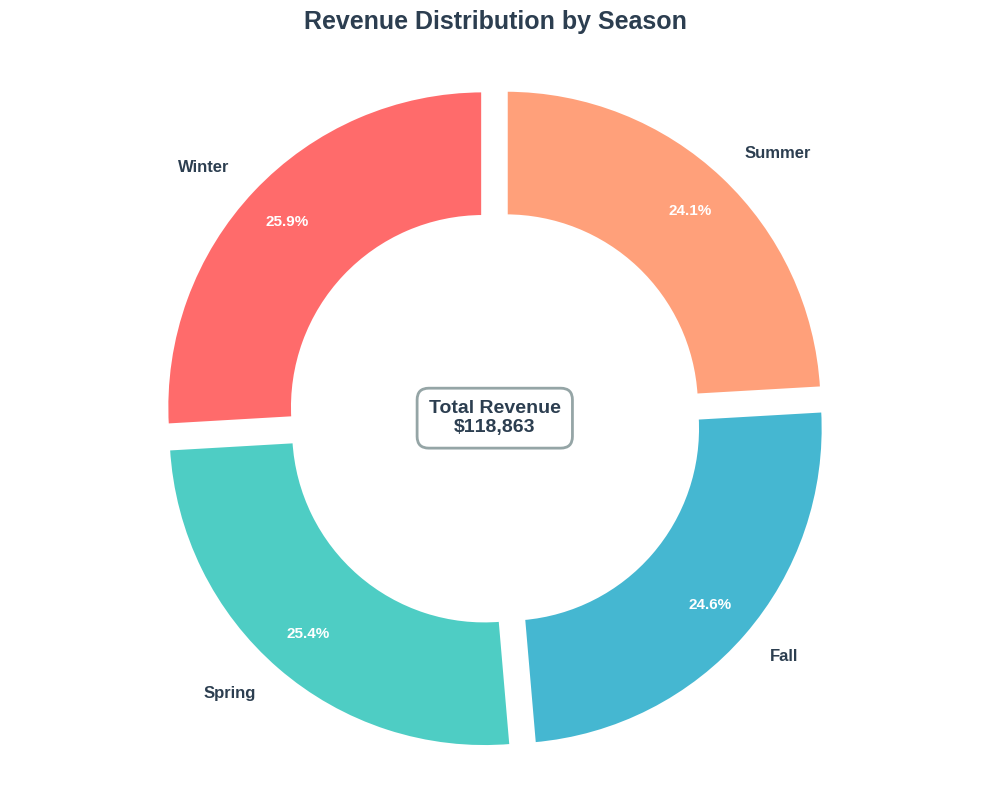


 Creating Purchase Count by Category Donut Chart...


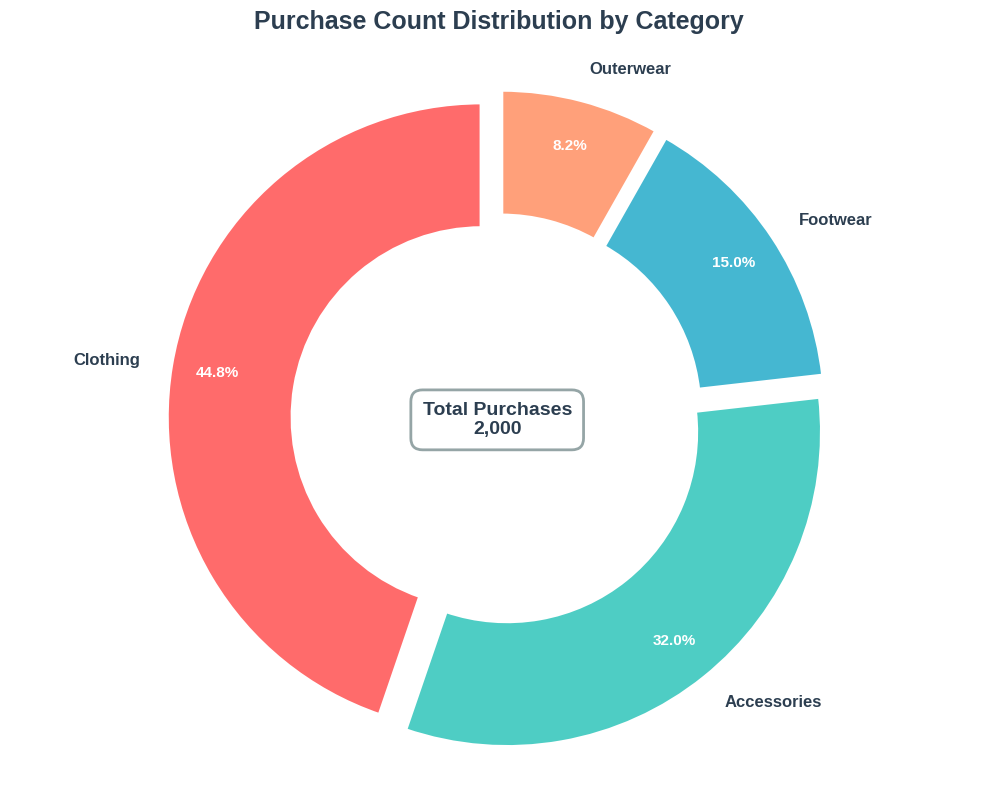


 Creating Size Distribution Donut Chart...


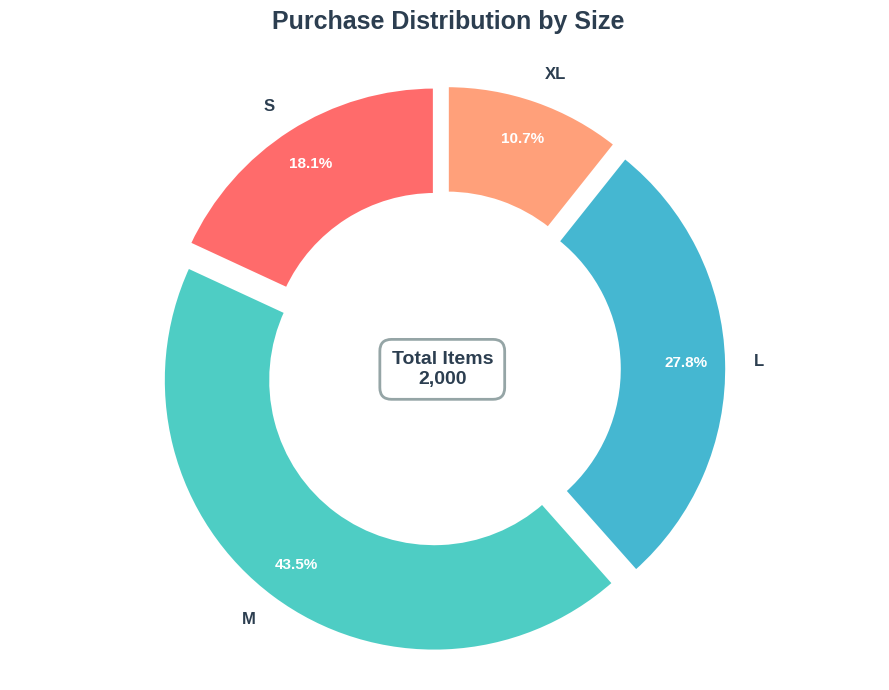


 Creating Top 5 Colors Revenue Donut Chart...


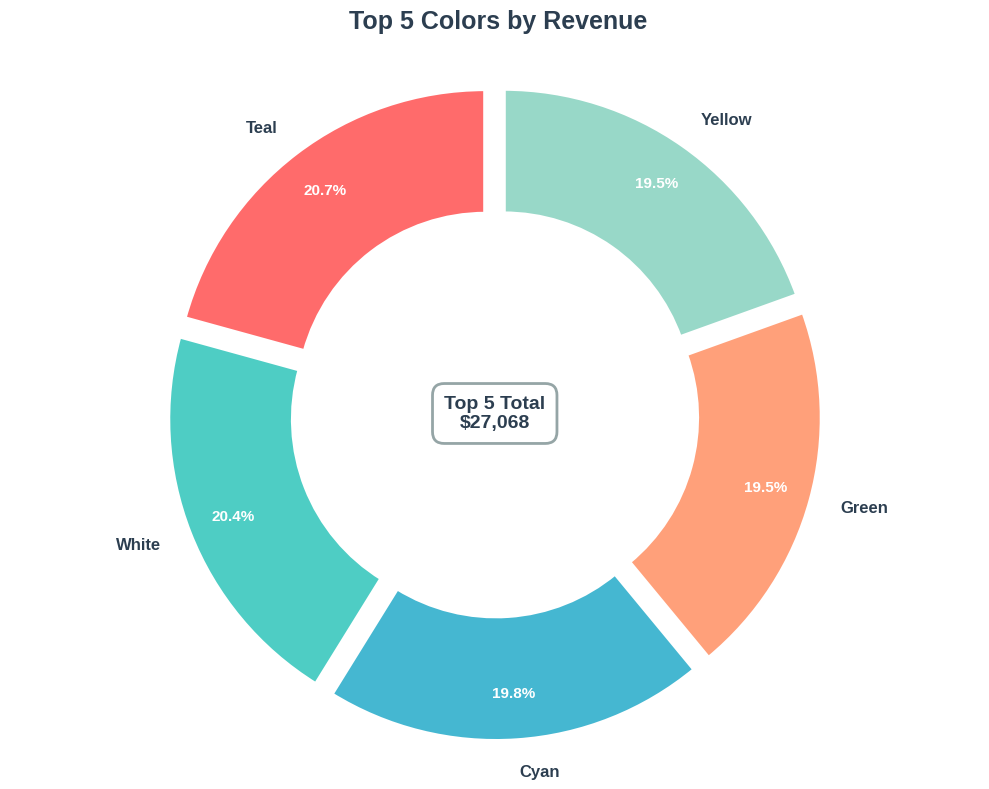


 Creating Comparative Donut Charts...


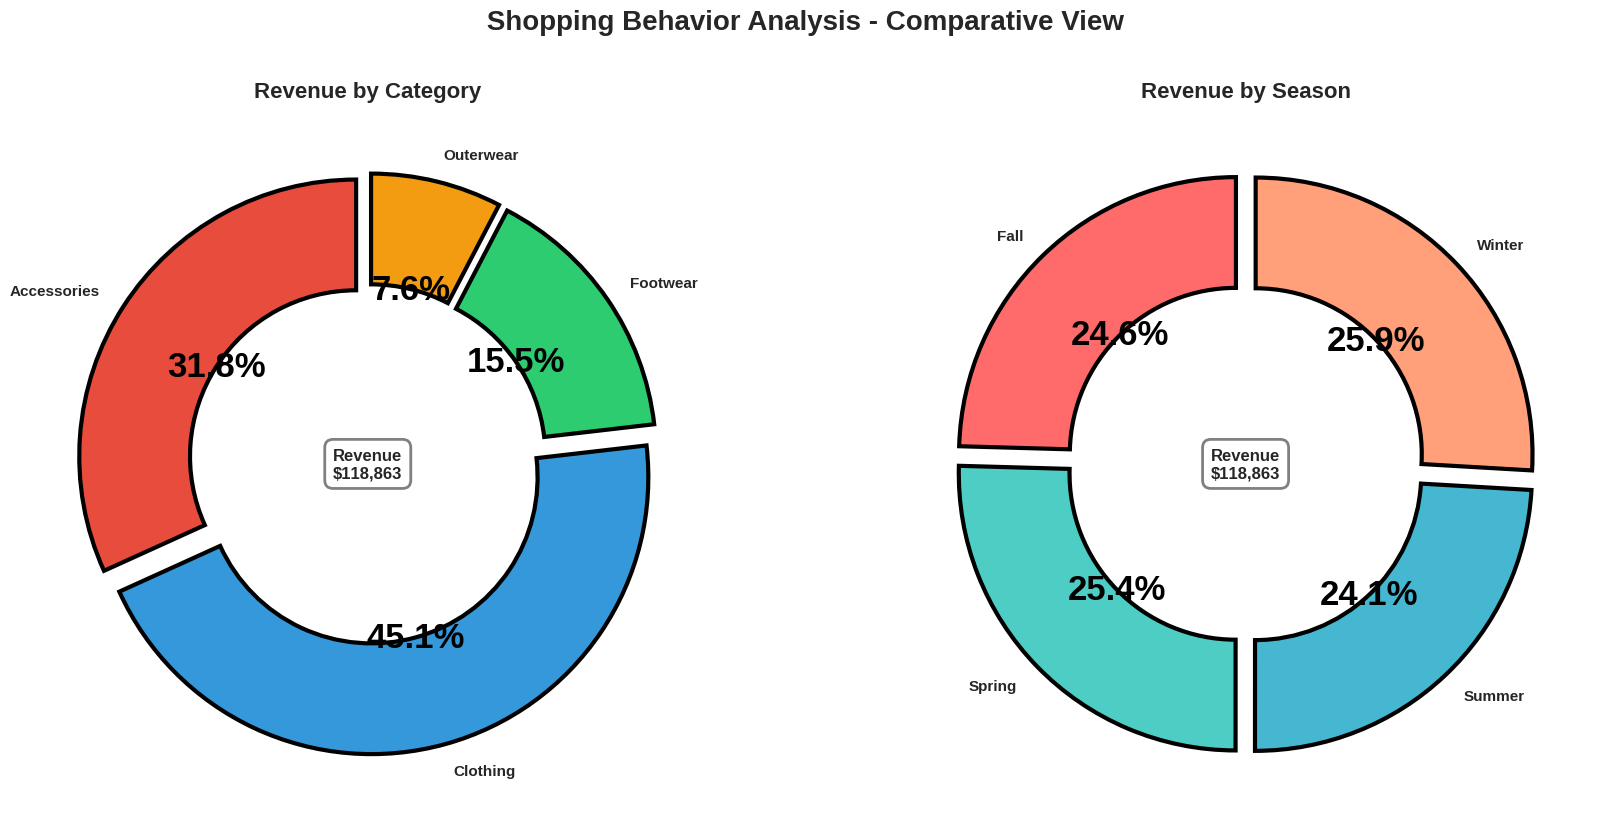

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')

# --- Load Data Function ---
def load_and_prepare_data(file_id=None, local_file=None):
    """
    Load shopping behavior data from CSV file.
    """
    try:
        if file_id:
            url = f"https://drive.google.com/uc?export=download&id=1Dp708WBa8hbbo7oXFrWTy0PBmVV8lflg"
            print(f"Loading data from Google Drive (file_id=1Dp708WBa8hbbo7oXFrWTy0PBmVV8lflg)...")
            df = pd.read_csv(url)
        elif local_file:
            print(f"Loading data from local file: {local_file}")
            df = pd.read_csv(local_file)

        # Convert Date column to datetime
        df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

        print(" Data loaded successfully!")
        print(f"\nDataset Info:")
        print(f"  - Total Records: {len(df)}")
        print(f"  - Date Range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
        print(f"  - Categories: {df['Category'].unique().tolist()}")
        print("\nFirst 5 rows:")
        print(df.head())

        return df

    except Exception as e:
        print(f" Error loading data: {e}")
        return None


# --- Create Donut Chart Function ---
def create_donut_chart(data, labels, title="Revenue Distribution",
                      center_text=None, colors=None, figsize=(10, 8)):

    fig, ax = plt.subplots(figsize=figsize)


    # Choosing Random Color for Donut Chart
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8',
                  '#F7DC6F', '#BB8FCE', '#85C1E2', '#F8B739', '#52B788']

    # Create donut chart
    wedges, texts, autotexts = ax.pie(
        data,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(data)],
        wedgeprops=dict(width=0.4, edgecolor='white', linewidth=3),
        pctdistance=0.85,
        explode=[0.05] * len(data)  # Slight separation for all slices
    )

    # Text Formatting
    for text in texts:
        text.set_fontsize(12)
        text.set_fontweight('bold')
        text.set_color('#2C3E50')

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(11)
        autotext.set_fontweight('bold')

    # Add center text
    if center_text:
        ax.text(0, 0, center_text,
                ha='center', va='center',
                fontsize=14, fontweight='bold',
                color='#2C3E50',
                bbox=dict(boxstyle="round,pad=0.6",
                         facecolor="white",
                         edgecolor="#95a5a6",
                         linewidth=2))

    # Add title
    plt.title(title, fontsize=18, fontweight='bold', pad=20, color='#2C3E50')

    # Equal aspect ratio ensures circular shape
    ax.axis('equal')

    plt.tight_layout()
    return fig


# --- Multiple Donut Charts Function ---
def create_multiple_donut_charts(df):
    """
    Create multiple donut charts for different aspects of shopping behavior.
    """

    # 1. Revenue by Category Donut Chart
    print("\n Creating Revenue by Category Donut Chart...")
    category_revenue = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

    create_donut_chart(
        data=category_revenue.values,
        labels=category_revenue.index,
        title=' Total Revenue by Product Category',
        center_text=f'Total Revenue\n${category_revenue.sum():,.0f}',
        colors=['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6']
    )
    plt.show()

    # 2. Purchases by Season Donut Chart
    print("\n Creating Purchases by Season Donut Chart...")
    season_purchases = df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

    create_donut_chart(
        data=season_purchases.values,
        labels=season_purchases.index,
        title='Revenue Distribution by Season',
        center_text=f'Total Revenue\n${season_purchases.sum():,.0f}',
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
    )
    plt.show()

    # 3. Purchase Count by Category Donut Chart
    print("\n Creating Purchase Count by Category Donut Chart...")
    category_count = df['Category'].value_counts()

    create_donut_chart(
        data=category_count.values,
        labels=category_count.index,
        title=' Purchase Count Distribution by Category',
        center_text=f'Total Purchases\n{category_count.sum():,}',
        colors=['#A569BD', '#5DADE2', '#52BE80', '#F4D03F', '#EC7063']
    )
    plt.show()

    # 4. Size Distribution Donut Chart
    print("\n Creating Size Distribution Donut Chart...")
    size_count = df['Size'].value_counts()
    size_order = ['S', 'M', 'L', 'XL']
    size_count = size_count.reindex(size_order, fill_value=0)

    create_donut_chart(
        data=size_count.values,
        labels=size_count.index,
        title=' Purchase Distribution by Size',
        center_text=f'Total Items\n{size_count.sum():,}',
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
        figsize=(9, 7)
    )
    plt.show()

    # 5. Top 5 Colors Revenue Donut Chart
    print("\n Creating Top 5 Colors Revenue Donut Chart...")
    color_revenue = df.groupby('Color')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5)

    create_donut_chart(
        data=color_revenue.values,
        labels=color_revenue.index,
        title=' Top 5 Colors by Revenue',
        center_text=f'Top 5 Total\n${color_revenue.sum():,.0f}',
        colors=['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6']
    )
    plt.show()


# --- Create Comparative Donut Charts ---
def create_comparative_donuts(df):
    """
    Create side-by-side comparison donut charts.
    """
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Left: Category Revenue
    category_revenue = df.groupby('Category')['Purchase Amount (USD)'].sum()
    colors1 = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6']

    wedges1, texts1, autotexts1 = axes[0].pie(
        category_revenue.values,
        labels=category_revenue.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors1[:len(category_revenue)],
        wedgeprops=dict(width=0.4, edgecolor='black', linewidth=3),
        explode=[0.05] * len(category_revenue)
    )

    for text in texts1:
        text.set_fontsize(11)
        text.set_fontweight('bold')

    for autotext in autotexts1:
        autotext.set_color('black')
        autotext.set_fontsize(25)
        autotext.set_fontweight('bold')

    axes[0].text(0, 0, f'Revenue\n${category_revenue.sum():,.0f}',
                ha='center', va='center', fontsize=12, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white",
                         edgecolor="gray", linewidth=2))
    axes[0].set_title('Revenue by Category', fontsize=16, fontweight='bold', pad=15)

    # Right: Season Revenue
    season_revenue = df.groupby('Season')['Purchase Amount (USD)'].sum()
    colors2 = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

    wedges2, texts2, autotexts2 = axes[1].pie(
        season_revenue.values,
        labels=season_revenue.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors2[:len(season_revenue)],
        wedgeprops=dict(width=0.4, edgecolor='black', linewidth=3),
        explode=[0.05] * len(season_revenue)
    )

    for text in texts2:
        text.set_fontsize(11)
        text.set_fontweight('bold')

    for autotext in autotexts2:
        autotext.set_color('black')
        autotext.set_fontsize(25)
        autotext.set_fontweight('bold')

    axes[1].text(0, 0, f'Revenue\n${season_revenue.sum():,.0f}',
                ha='center', va='center', fontsize=12, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white",
                         edgecolor="gray", linewidth=2))
    axes[1].set_title('Revenue by Season', fontsize=16, fontweight='bold', pad=15)

    plt.suptitle(' Shopping Behavior Analysis - Comparative View',
                fontsize=20, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


# --- Print Summary Statistics ---
def print_summary_stats(df):
    """
    Print comprehensive summary statistics.
    """
    print("\n" + "="*70)
    print("                    SHOPPING BEHAVIOR SUMMARY")
    print("="*70)

    # Category Statistics
    print("\n CATEGORY BREAKDOWN:")
    print("-" * 70)
    category_stats = df.groupby('Category').agg({
        'Purchase Amount (USD)': ['sum', 'mean', 'count']
    }).round(2)
    category_stats.columns = ['Total Revenue', 'Avg Purchase', 'Count']
    print(category_stats.to_string())

    # Season Statistics
    print("\n SEASON BREAKDOWN:")
    print("-" * 70)
    season_stats = df.groupby('Season').agg({
        'Purchase Amount (USD)': ['sum', 'mean', 'count']
    }).round(2)
    season_stats.columns = ['Total Revenue', 'Avg Purchase', 'Count']
    print(season_stats.to_string())

    # Overall Statistics
    print("\n OVERALL STATISTICS:")
    print("-" * 70)
    print(f"  Total Revenue:          ${df['Purchase Amount (USD)'].sum():,.2f}")
    print(f"  Average Purchase:       ${df['Purchase Amount (USD)'].mean():.2f}")
    print(f"  Total Transactions:     {len(df):,}")
    print(f"  Unique Customers:       {df['Customer ID'].nunique():,}")

    print("\n" + "="*70)


# --- Main Execution ---
def main():
    """
    Main function to execute donut chart analysis.
    """
    print("\n" + "="*70)
    print("       SHOPPING BEHAVIOR DONUT CHART ANALYSIS TOOL ")
    print("="*70)

    # Load data - Update this path to your CSV file location
    file_path = "shopping_behavior_Pattern.csv"
    df = load_and_prepare_data(file_path)

    if df is not None:
        # Print summary statistics
        print_summary_stats(df)

        # Create all donut charts
        print("\n" + "="*70)
        print("                  GENERATING DONUT CHARTS")
        print("="*70)

        # Individual donut charts
        create_multiple_donut_charts(df)

        # Comparative donut charts
        print("\n Creating Comparative Donut Charts...")
        create_comparative_donuts(df)


    else:
        print("\n Analysis failed. Please check the file path and format.")


# Run the analysis
if __name__ == "__main__":
    main()

# **------------Thank You------------**
# **Project Submitted by :-**
# **Sk Ashif Ahmmad**